In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

In [ ]:
data = pd.read_csv('Admission_Predict.csv')
    

In [ ]:
df = data.copy()
df.tail(20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
380,381,322,104,3,3.5,4.0,8.84,1,0.78
381,382,319,105,3,3.0,3.5,8.67,1,0.73
382,383,324,110,4,4.5,4.0,9.15,1,0.82
383,384,300,100,3,3.0,3.5,8.26,0,0.62
384,385,340,113,4,5.0,5.0,9.74,1,0.96
385,386,335,117,5,5.0,5.0,9.82,1,0.96
386,387,302,101,2,2.5,3.5,7.96,0,0.46
387,388,307,105,2,2.0,3.5,8.10,0,0.53
388,389,296,97,2,1.5,2.0,7.80,0,0.49
389,390,320,108,3,3.5,4.0,8.44,1,0.76


In [ ]:
df.drop('Serial No.', axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:

df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.shape

(400, 8)

In [ ]:

df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

<Axes: xlabel='GRE Score', ylabel='Density'>

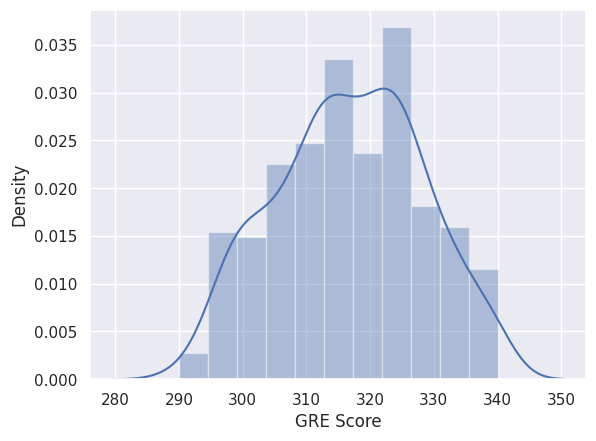

In [ ]:
sns.distplot(data['GRE Score'])

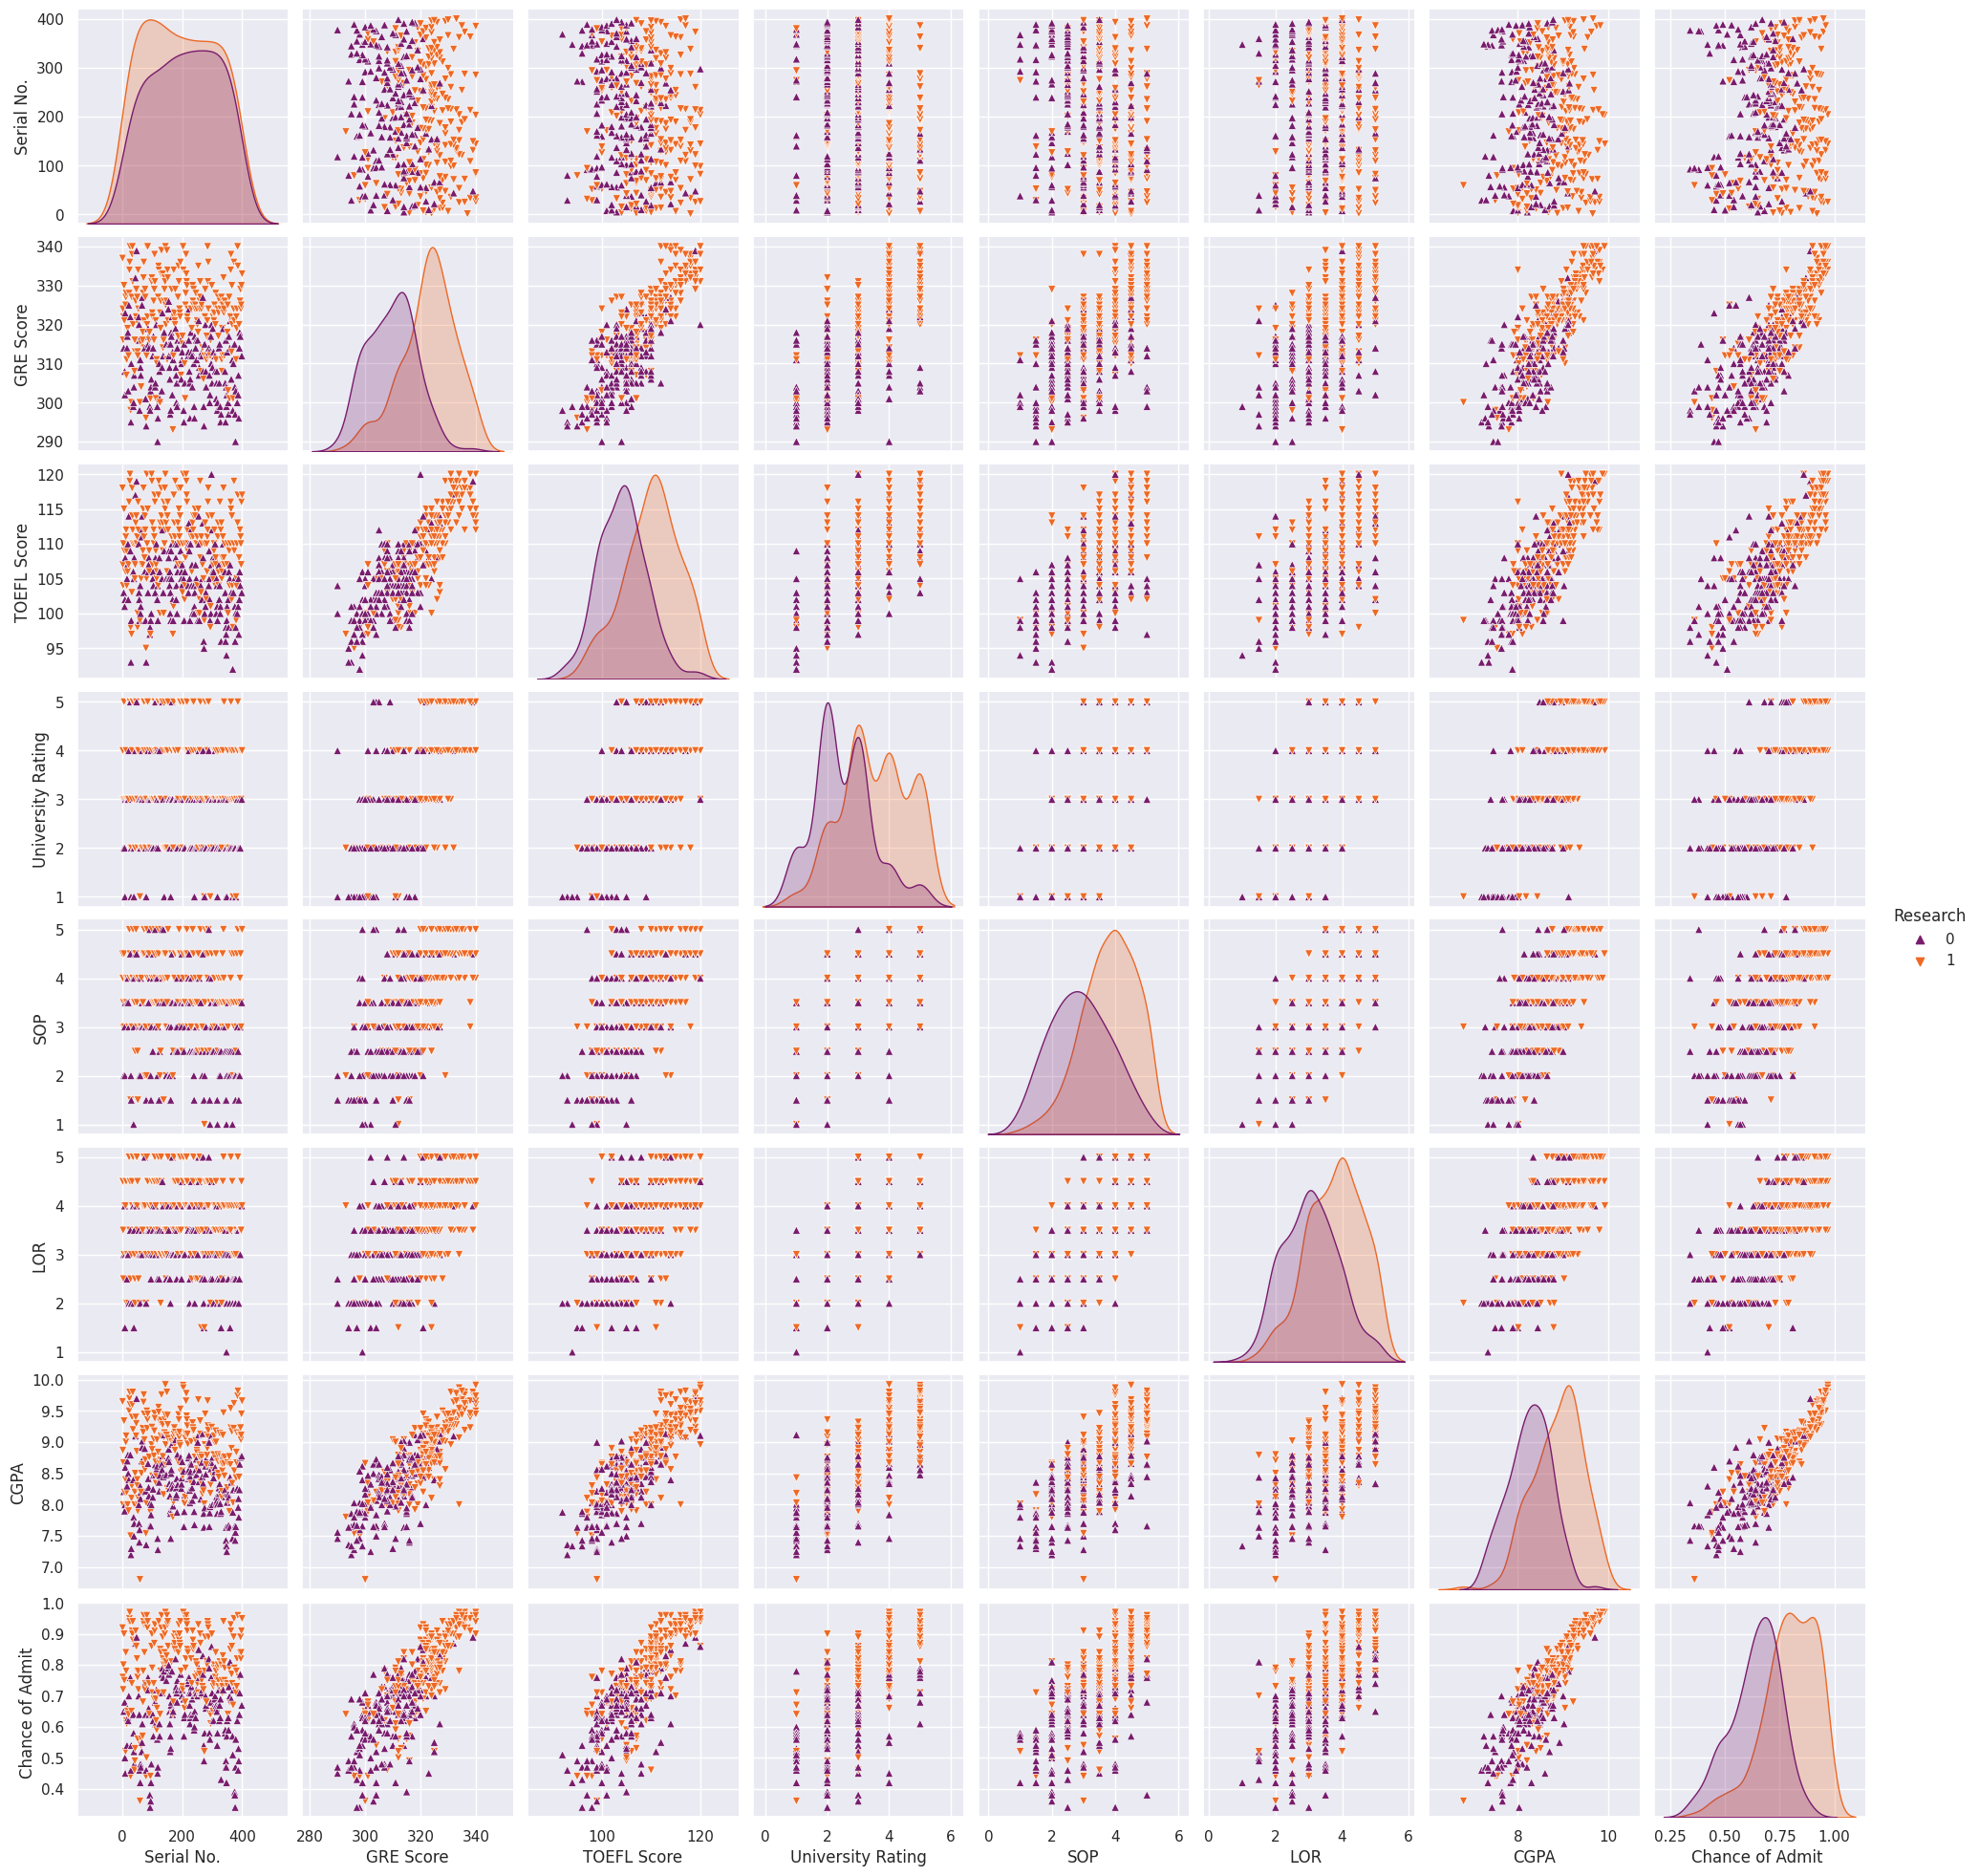

In [ ]:
sns.pairplot(data=data,hue='Research',markers=["^","v"],palette='inferno')

<Axes: xlabel='University Rating', ylabel='CGPA'>

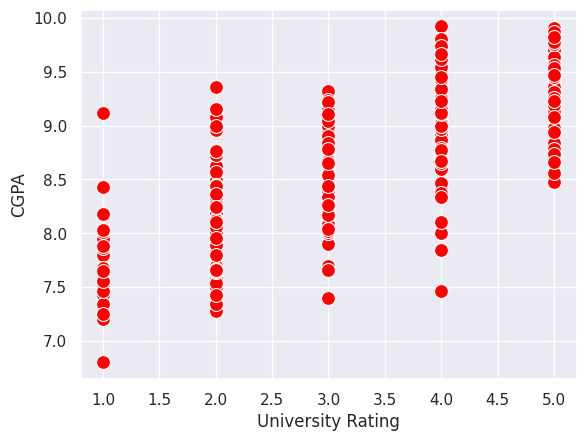

In [ ]:
sns.scatterplot(x='University Rating',y='CGPA',data=data,color='Red',s=100)

In [ ]:
df[['GRE Score', 'Chance of Admit']].corr()

,GRE Score,Chance of Admit
GRE Score,1.00000,0.80261
Chance of Admit,0.80261,1.00000


KeyError: ignored

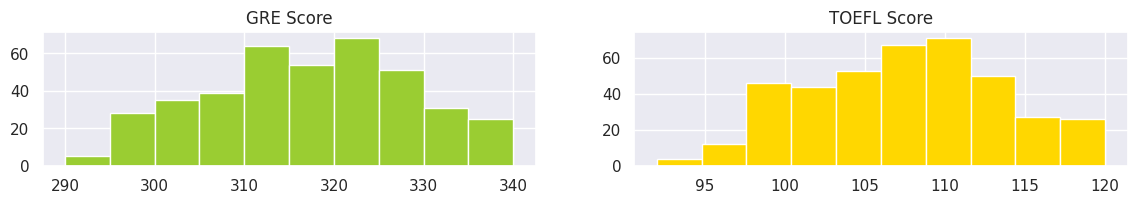

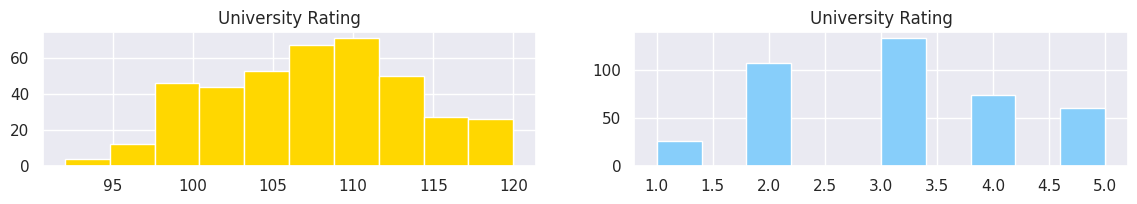

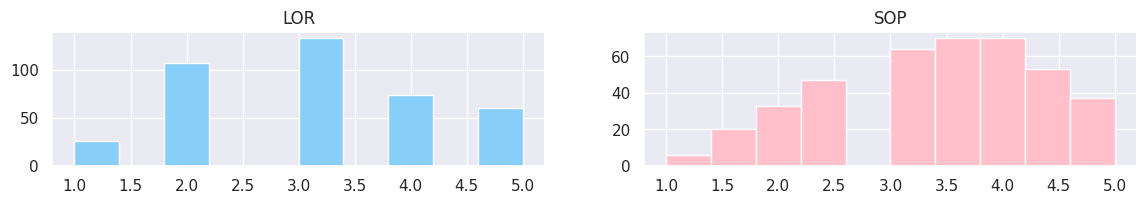

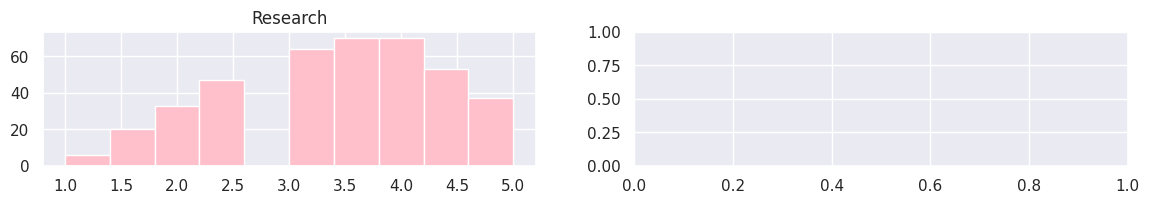

In [ ]:
category = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit']
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
  fig = plt.figure(figsize=(14,8))
  plt.subplot2grid((4,2),(i,0))
  data[category[i]].hist(color=color[i],bins=10)
  plt.title(category[2*i])
  plt.subplot2grid((4,2),(i,1))
  data[category[i+1]].hist(color=color[i+1],bins=10)
  plt.title(category[i+1])
plt.subplots_adjust(hspace = 0.7,wspace = 0.2)
plt.show()

<Axes: xlabel='GRE Score', ylabel='Chance of Admit'>

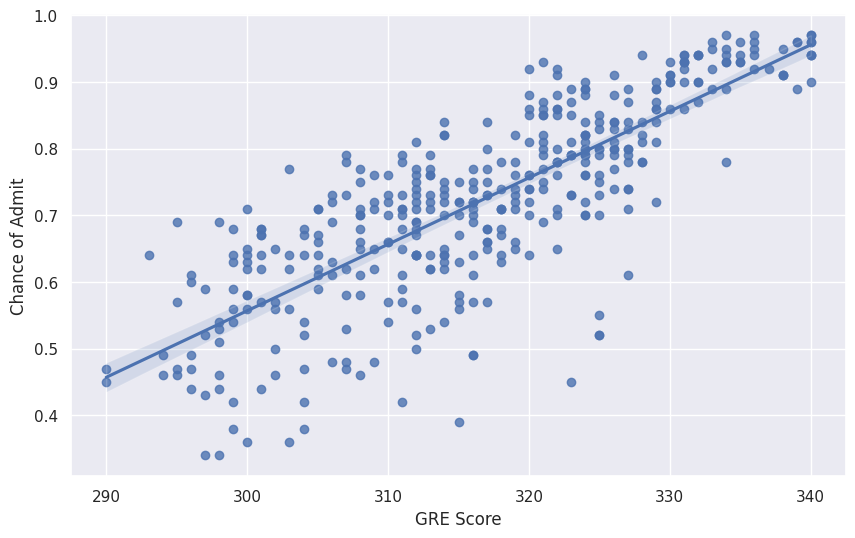

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='GRE Score', y='Chance of Admit', data=df)

In [ ]:
from scipy import stats
     

p_coeff, p_value = stats.pearsonr(df['GRE Score'], df['Chance of Admit'])
print('Pearson Coefficient:', p_coeff)
print('P Value:            ', p_value)

Pearson Coefficient: 0.8026104595903503
P Value:             2.458112414178991e-91


In [ ]:
df[['TOEFL Score', 'Chance of Admit']].corr()

,TOEFL Score,Chance of Admit
TOEFL Score,1.000000,0.791594
Chance of Admit,0.791594,1.000000


<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit'>

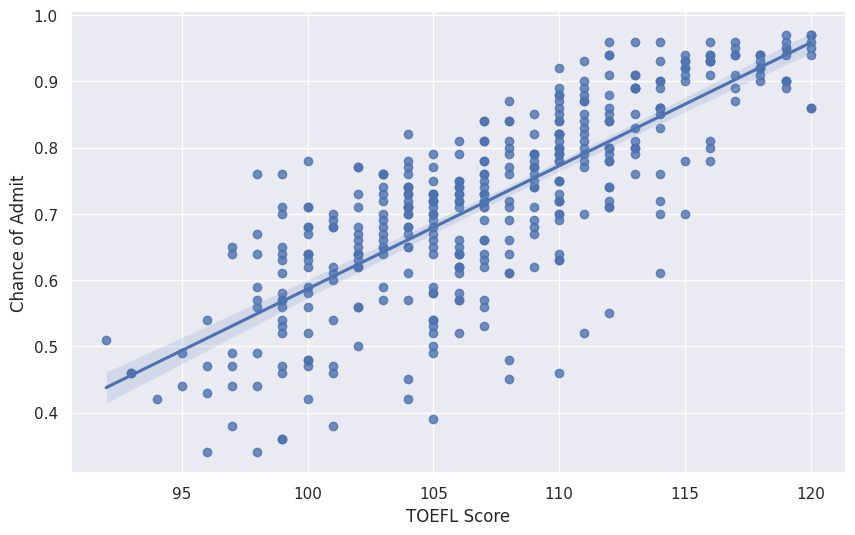

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='TOEFL Score', y='Chance of Admit')
     

In [ ]:
p_coeff, p_value = stats.pearsonr(df['TOEFL Score'], df['Chance of Admit'])
print('Pearson Coefficient:', p_coeff)
print('Pearson Value:      ', p_value)

Pearson Coefficient: 0.7915939869351045
Pearson Value:       3.6341021759970527e-87


<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

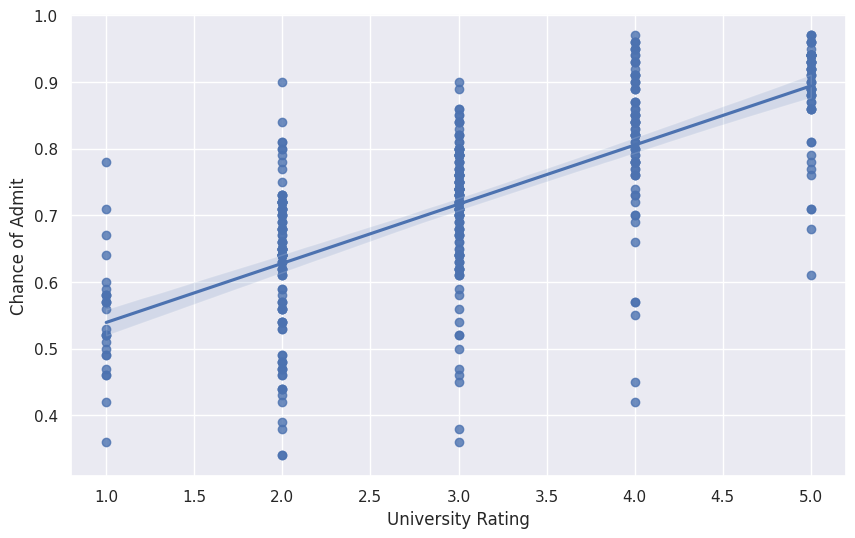

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['University Rating'], y=df['Chance of Admit'])
     

<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

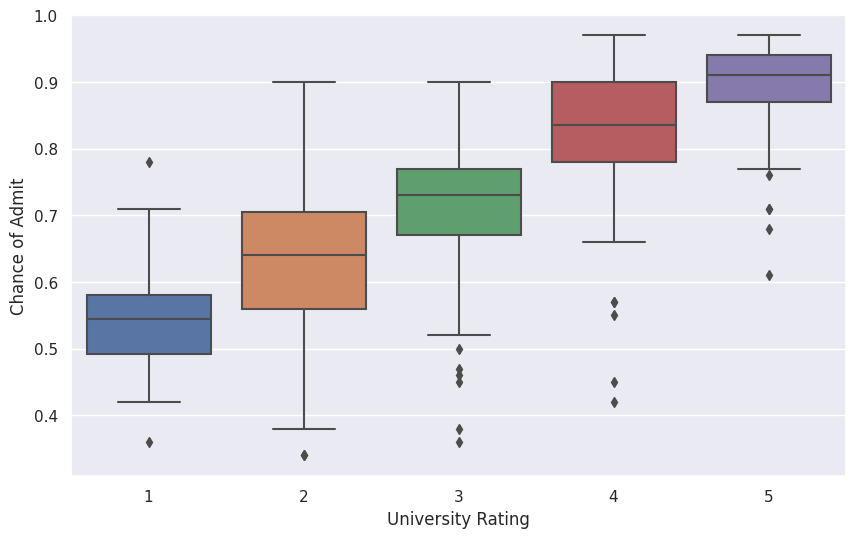

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='University Rating', y='Chance of Admit')

In [ ]:


df[['University Rating', 'Chance of Admit']].corr()

,University Rating,Chance of Admit
University Rating,1.00000,0.71125
Chance of Admit,0.71125,1.00000


In [ ]:
coef, pvalue = stats.pearsonr(df['University Rating'], df['Chance of Admit'])
coef, pvalue
     

(0.7112502503917222, 6.635019480888963e-63)

In [ ]:
df_rating_grp = df[['University Rating', 'Chance of Admit']].groupby(['University Rating'])
     

In [ ]:
f, pvalue = stats.f_oneway(df_rating_grp.get_group(1)['Chance of Admit'], 
                           df_rating_grp.get_group(2)['Chance of Admit'], 
                           df_rating_grp.get_group(3)['Chance of Admit'], 
                           df_rating_grp.get_group(4)['Chance of Admit'], 
                           df_rating_grp.get_group(5)['Chance of Admit'])

print('f oneway:', f, '\nP Value:', pvalue)
     

f oneway: 102.0800521553914 
P Value: 1.313389994668425e-59


<Axes: xlabel='SOP', ylabel='Chance of Admit'>

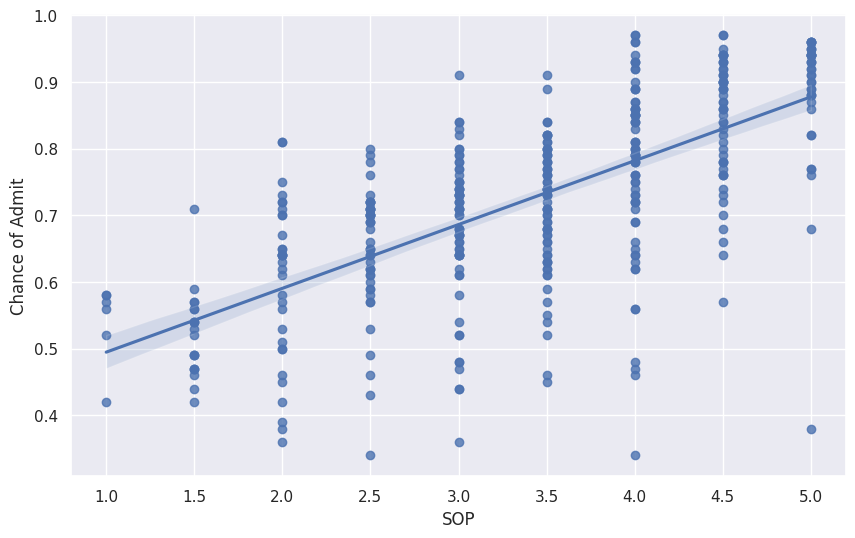

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='SOP', y='Chance of Admit')
     

In [ ]:
df[['SOP', 'Chance of Admit']].corr()
     

,SOP,Chance of Admit
SOP,1.000000,0.675732
Chance of Admit,0.675732,1.000000


<Axes: xlabel='SOP', ylabel='Chance of Admit'>

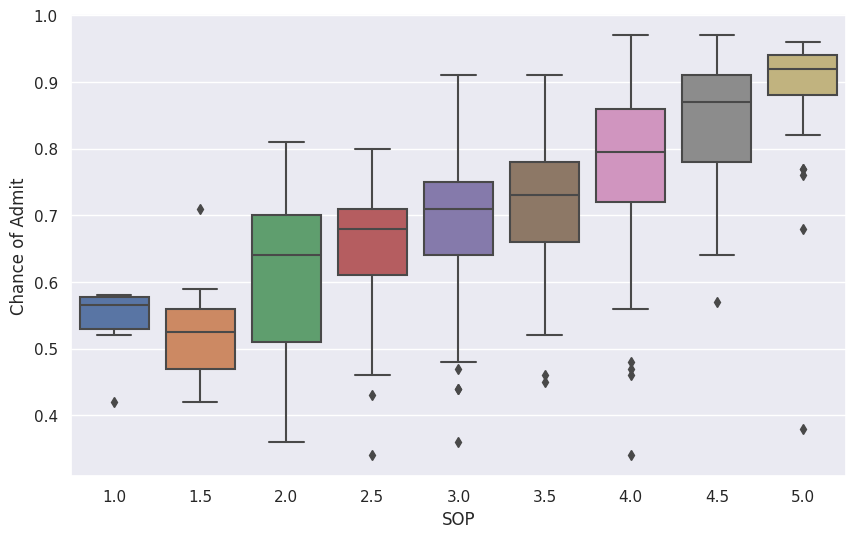

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='SOP', y='Chance of Admit')

In [ ]:
p_coeff, pvalue = stats.pearsonr(df.SOP, df['Chance of Admit'])

print('Pearson Coefficient: ', p_coeff)
print('P Value:             ', pvalue)

Pearson Coefficient:  0.675731858388672
P Value:              1.1410946671022982e-54


In [ ]:
df_sop_grp = df[['SOP', 'Chance of Admit']].groupby(['SOP'])
     

In [ ]:
f, pvalue = stats.f_oneway(df_sop_grp.get_group(1.0)['Chance of Admit'],
                          df_sop_grp.get_group(1.5)['Chance of Admit'],
                          df_sop_grp.get_group(2.0)['Chance of Admit'],
                          df_sop_grp.get_group(2.5)['Chance of Admit'],
                          df_sop_grp.get_group(3.0)['Chance of Admit'],
                          df_sop_grp.get_group(3.5)['Chance of Admit'],
                          df_sop_grp.get_group(4.0)['Chance of Admit'],
                          df_sop_grp.get_group(4.5)['Chance of Admit'],
                          df_sop_grp.get_group(5.0)['Chance of Admit'])

f, pvalue

(42.64667458928518, 7.2405682104781e-49)

<Axes: xlabel='LOR', ylabel='Chance of Admit'>

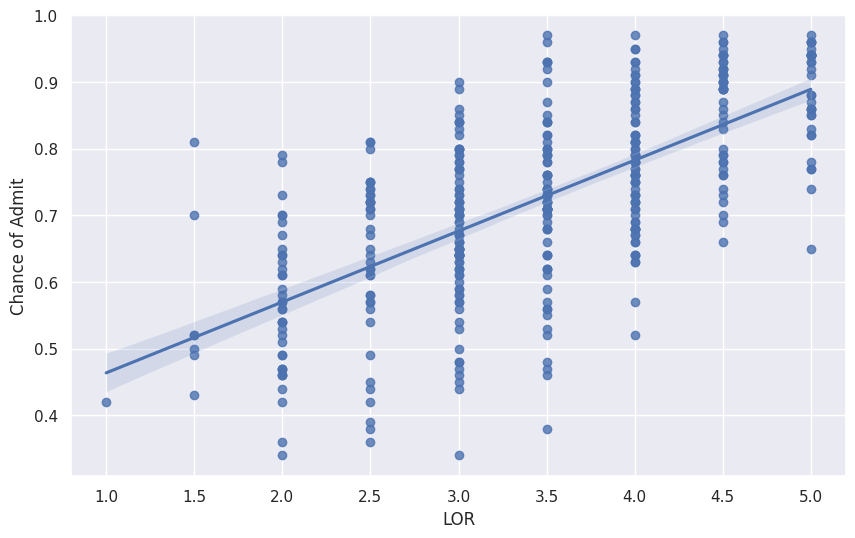

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df.LOR, y=df['Chance of Admit'])
     

In [ ]:
df[['LOR', 'Chance of Admit']].corr()

,LOR,Chance of Admit
LOR,1.000000,0.669889
Chance of Admit,0.669889,1.000000


In [ ]:
df[['LOR', 'Chance of Admit']].corr()

,LOR,Chance of Admit
LOR,1.000000,0.669889
Chance of Admit,0.669889,1.000000


In [ ]:
df_lor_grp = df[['LOR', 'Chance of Admit']].groupby('LOR')

In [ ]:
f, pvalue = stats.f_oneway(df_lor_grp.get_group(1.0)['Chance of Admit'],
                          df_lor_grp.get_group(1.5)['Chance of Admit'],
                          df_lor_grp.get_group(2.0)['Chance of Admit'],
                          df_lor_grp.get_group(2.5)['Chance of Admit'],
                          df_lor_grp.get_group(3.0)['Chance of Admit'],
                          df_lor_grp.get_group(3.5)['Chance of Admit'],
                          df_lor_grp.get_group(4.0)['Chance of Admit'],
                          df_lor_grp.get_group(4.5)['Chance of Admit'],
                          df_lor_grp.get_group(5.0)['Chance of Admit'])

f, pvalue
     

(40.94235310849056, 2.675772604311782e-47)

<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

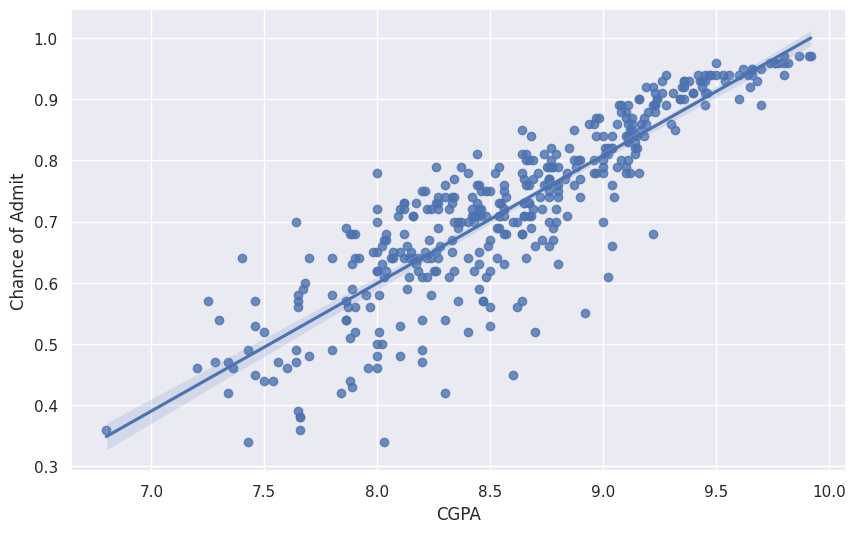

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df.CGPA, y=df['Chance of Admit'])

In [ ]:
df[['CGPA', 'Chance of Admit']].corr()

,CGPA,Chance of Admit
CGPA,1.000000,0.873289
Chance of Admit,0.873289,1.000000


In [ ]:
p_coeff, pvalue = stats.pearsonr(df.CGPA, df['Chance of Admit'])

p_coeff, pvalue

(0.8732890993553003, 2.3365140004978882e-126)

<Axes: xlabel='Research', ylabel='Chance of Admit'>

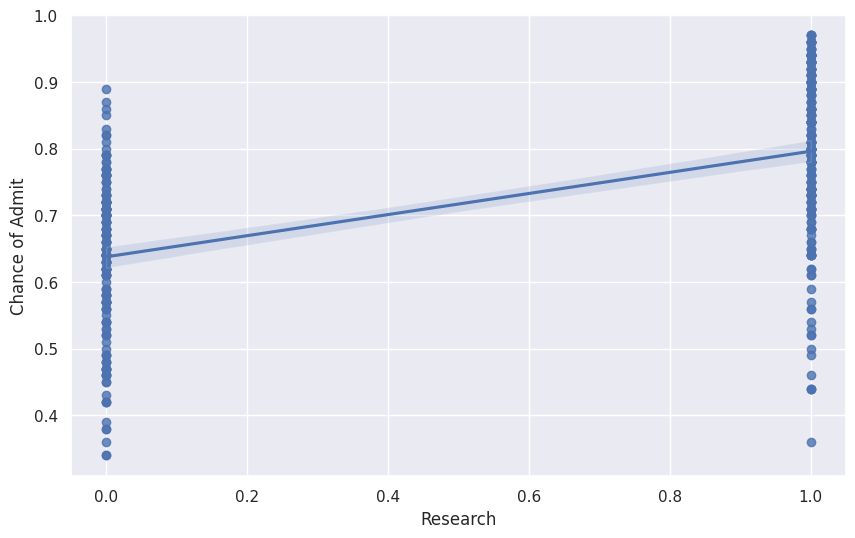

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df.Research, y=df['Chance of Admit'])

In [ ]:
df[['Research', 'Chance of Admit']].corr()

,Research,Chance of Admit
Research,1.000000,0.553202
Chance of Admit,0.553202,1.000000


<Axes: xlabel='Research', ylabel='count'>

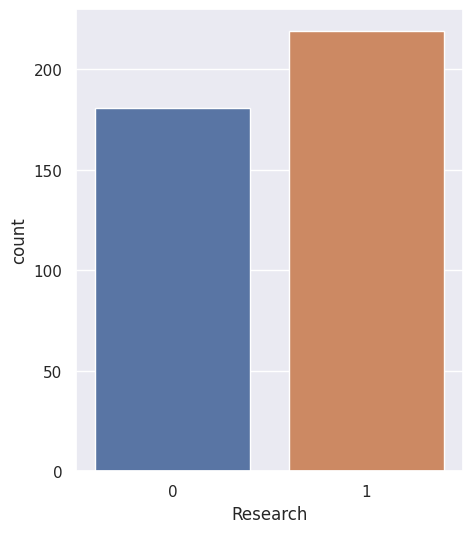

In [ ]:
plt.figure(figsize=(5, 6))
sns.countplot(x=df.Research)

<Axes: xlabel='Research', ylabel='Chance of Admit'>

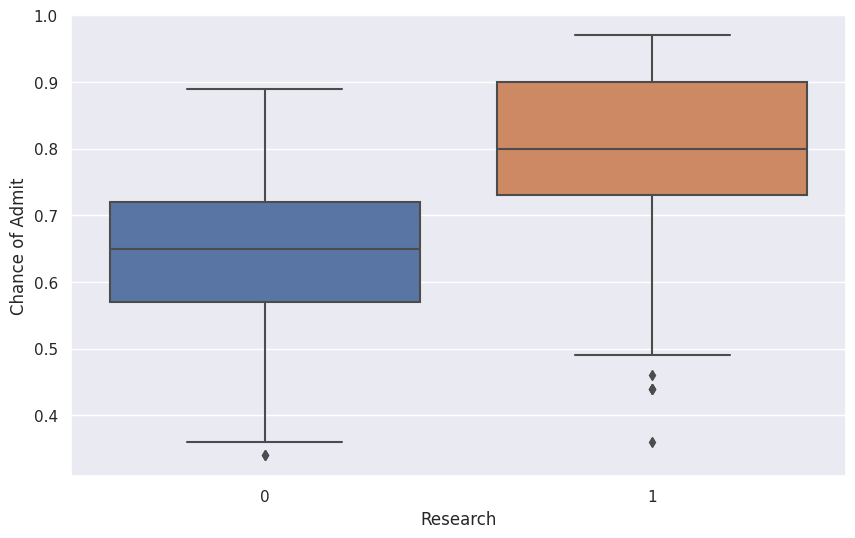

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.Research, y=df['Chance of Admit'])
     

In [ ]:
df_res_grp = df[['Research', 'Chance of Admit']].groupby('Research')
     

In [ ]:
f, pvalue = stats.f_oneway(df_res_grp.get_group(1)['Chance of Admit'],
                           df_res_grp.get_group(0)['Chance of Admit'])
f, pvalue

(175.51397562026247, 1.9181733806927185e-33)

<Axes: >

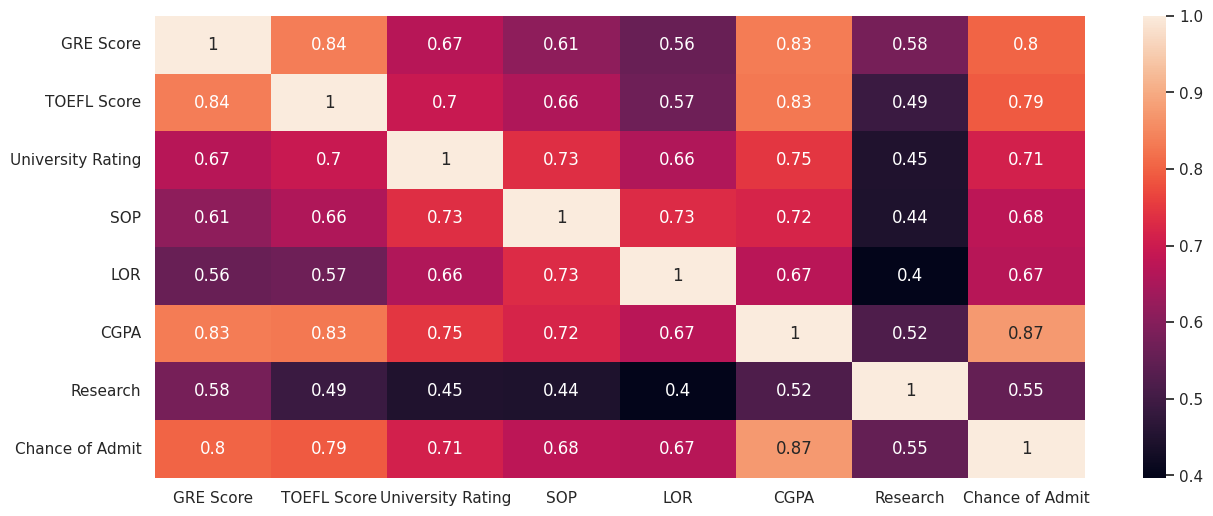

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(data=df.corr(), annot=True)

In [ ]:
X = df.drop('Chance of Admit', axis=1)
Y = df[['Chance of Admit']]

X.shape, Y.shape

((400, 7), (400, 1))

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, shuffle=True, test_size=0.30)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(280, 7) (280, 1)
(120, 7) (120, 1)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model=keras.Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss= 'binary_crossentropy', optimizer ='adam',metrics =['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, shuffle=True, test_size=0.30)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)
     

(280, 7) (280, 1)
(120, 7) (120, 1)


In [ ]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(random_state=42, n_jobs=4)

lasso.fit(xtrain, ytrain)
regularized_model_prediction = lasso.predict(xtest)
     

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(ytest, regularized_model_prediction)

0.7904544971285603

In [ ]:
pip install virtualenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 7.5 MB/s eta 0:00:00


In [ ]:
Sudo  apt - get install virtualenv 

SyntaxError: ignored

In [ ]:
pip install flask


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install virtualenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y virtualenv

Selecting previously unselected package python-pip-whl.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../0-python-pip-whl_20.0.2-5ubuntu1.8_all.deb ...
Unpacking python-pip-whl (20.0.2-5ubuntu1.8) ...
Selecting previously unselected package python3-appdirs.
Preparing to unpack .../1-python3-appdirs_1.4.3-2.1_all.deb ...
Unpacking python3-appdirs (1.4.3-2.1) ...
Selecting previously unselected package python3-distlib.
Preparing to unpack .../2-python3-distlib_0.3.0-1_all.deb ...
Unpacking python3-distlib (0.3.0-1) ...
Selecting previously unselected package python3-filelock.
Preparing to unpack .../3-python3-filelock_3.0.12-2_all.deb ...
Unpacking python3-filelock (3.0.12-2) ...
Selecting previously unselected package python3-more-itertools.
Preparing to unpack .../4-python3-more-itertools_4.2.0-1build1_all.deb ...
Unpacking python3-more-itertools (4.2.0-1build1) ...
Selecting previously unselected package python3-zipp.
Preparing to unpack

In [ ]:
Y=np.array(df[df.columns[-1]])
X=np.array(df.drop(df.columns[-1],axis=1))

In [ ]:
import numpy as np

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


In [ ]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df=df.drop("Serial No.",axis=1)


In [ ]:
Y=np.array(df[df.columns[-1]])
X=np.array(df.drop(df.columns[-1],axis=1))


In [ ]:
def baseline_model():
    model = Sequential()
    model.add(Dense(16, input_dim=7, activation='relu'))
    model.add(Dense(16, input_dim=7, activation='relu'))
    model.add(Dense(16, input_dim=7, activation='relu'))
    model.add(Dense(16, input_dim=7, activation='relu'))
    model.add(Dense(1))    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [ ]:
def baseline_model():
    model = Sequential()
    model.add(Dense(16, input_dim=7, activation='relu'))
    model.add(Dense(16, input_dim=7, activation='relu'))
    model.add(Dense(16, input_dim=7, activation='relu'))
    model.add(Dense(16, input_dim=7, activation='relu'))
    model.add(Dense(1))    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=3, verbose=1)
estimator.fit(X_train,y_train)

Epoch 1/50
107/107 [==============================] - 1s 2ms/step - loss: 0.3285
Epoch 2/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 3/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 4/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 5/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 6/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 7/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 8/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 9/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 10/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 11/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 12/50
107/107 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 13/50
107/107 [====

In [ ]:
prediction = estimator.predict(X_test)
print("ORIGINAL DATA")
print(y_test)
print()
print("PREDICTED DATA")
print(prediction)

27/27 [==============================] - 0s 1ms/step
ORIGINAL DATA
[0.71 0.7  0.79 0.73 0.72 0.48 0.77 0.71 0.9  0.94 0.58 0.89 0.72 0.57
 0.78 0.42 0.64 0.84 0.63 0.72 0.9  0.83 0.57 0.47 0.85 0.67 0.44 0.54
 0.92 0.62 0.68 0.73 0.73 0.61 0.55 0.74 0.64 0.89 0.73 0.95 0.71 0.72
 0.75 0.76 0.86 0.7  0.39 0.79 0.61 0.64 0.71 0.8  0.61 0.89 0.68 0.79
 0.78 0.52 0.76 0.88 0.74 0.49 0.65 0.59 0.87 0.89 0.81 0.9  0.8  0.76
 0.68 0.87 0.68 0.64 0.91 0.61 0.69 0.62 0.93 0.43]

PREDICTED DATA
[0.70140636 0.69080156 0.7875949  0.6147866  0.71869516 0.57295567
 0.7175214  0.6256522  0.87700415 0.9403942  0.5074033  0.91252214
 0.6892326  0.46050537 0.8737347  0.6267133  0.59057295 0.81086123
 0.54035765 0.74665856 0.9038699  0.85924196 0.6466308  0.3852276
 0.7961862  0.5341341  0.36052594 0.65759766 0.9201956  0.61577576
 0.6046728  0.7465857  0.7405407  0.5305166  0.78512406 0.78364956
 0.64280266 0.88752604 0.6188268  0.9548625  0.7339631  0.6580454
 0.72031665 0.8278748  0.834787   0.6658633

In [ ]:
from sklearn.metrics import accuracy_score
 
train_error =  np.abs(y_test - prediction)
mean_error = np.mean(train_error)
 
print("Mean Error: ",mean_error)

Mean Error:  0.05248128654062747


In [ ]:
y_train=(y_train>0.5)
y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
y_test=(y_test>0.5)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model=keras.Sequential()

In [ ]:
model.add(Dense(7,activation='relu',input_dim=7))

In [ ]:
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train=(y_train>0.5)
y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
model.save('model.h5')

In [ ]:
import numpy as np
from flask import Flask,request,jsonify,render_template
import pickle
app =Flask(__name__)
from tensorflow.keras.models import load_model

In [ ]:
model =load_model('model.h5')

In [ ]:
@app.route('/')
def home():
  return render_template('Demo2.html')